In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def pt(table):
    for i in range(len(table)):
        print(table[i])

def pt_plt(table):
    height = len(table)
    width = len(table[0])

    # plt.axis('equal')
    plt.xlim(0,1)
    plt.ylim(0,1)
    for i in range(height):
        for j in range(width):
            if table[i][j][0]:
                plt.scatter(j/width, i/height, color='black', marker = 's')
    plt.show()


In [4]:
def setClock(map, xcenter, ycenter, r, width, height, hour):
    clock = hour
    theta_clock = -2*np.pi*clock/12 + np.pi/2
    for i in range(width):
        r_clock = r * i /width
        x = xcenter + int(r_clock*np.cos(theta_clock))
        y = ycenter + int(r_clock*np.sin(theta_clock))
        if (x>=0 and x< width) and (y>=0 and y< height):
            map[y][x][0] = 1

def createMap(width, height):
    map = [[[0] for i in range(width)]for i in range(height)]
    xcenter = int(width //2 + width//4*random.uniform(-1, 1))
    ycenter = int(height//2 + height//4*random.uniform(-1, 1))
    r = (width //4)*(1+random.random())
    for i in range(2*(width+height)):
        theta = 2*np.pi*i/(2*(width+height))
        x = xcenter + int(r*np.cos(theta))
        y = ycenter + int(r*np.sin(theta))
        if (x>=0 and x< width) and (y>=0 and y< height):
            map[y][x][0] = 1
    return xcenter, ycenter, r, map

3


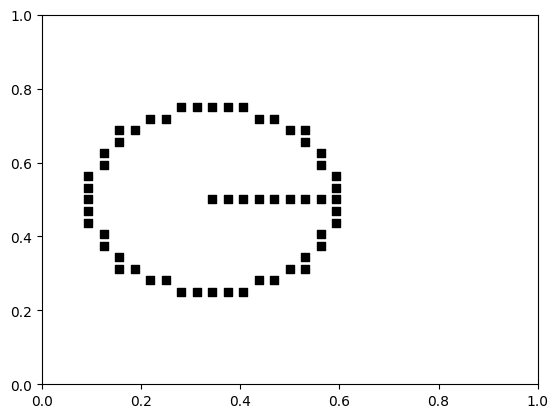

In [86]:
#create a round frame
width = height = 32
xcenter, ycenter,r,  map = createMap(width, height)

#set hour
clock = 12*random.random()
setClock(map, xcenter, ycenter, r, width, height, clock)
print(int(clock))

pt
pt_plt(map)

In [5]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
x_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/Lecture05/data/x_train.npy')
t_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/Lecture05/data/t_train.npy')

In [ ]:
#学習データ作成
num_data = 50000
x_data = []
t_data = []
for i in range(num_data):
    width = height = 32
    #create a round frame
    xcenter, ycenter,r,  map = createMap(width, height)

    #set hour
    clock = 12*random.random()
    setClock(map, xcenter, ycenter, r, width, height, clock)

    x_data.append(map)
    t_data.append(int(clock))
    if i %1000 ==0:
        print('{}/{}'.format(i, num_data))

x_data = np.array(x_data)
t_data = np.array(t_data)

0/50000
1000/50000
2000/50000
3000/50000
4000/50000
5000/50000
6000/50000
7000/50000
8000/50000
9000/50000
10000/50000
11000/50000
12000/50000
13000/50000
14000/50000
15000/50000
16000/50000
17000/50000
18000/50000
19000/50000
20000/50000
21000/50000
22000/50000
23000/50000
24000/50000
25000/50000
26000/50000
27000/50000
28000/50000
29000/50000
30000/50000
31000/50000
32000/50000


In [107]:
print(x_data.shape)
print(t_data.shape)

(10000, 32, 32, 1)
(10000,)


In [108]:
np.save('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/FinalAssignment/data/x_test.npy', x_data)
np.save('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/FinalAssignment/data/t_test.npy', t_data)